In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 6.9MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset = dataset ['train']
test_dataset = dataset ['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_num = metadata.splits['train'].num_examples
test_num = metadata.splits['test'].num_examples
print ("Number of training images: {}".format(train_num))
print ("Number of test images: {}".format(test_num))

Number of training images: 60000
Number of test images: 10000


In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images = images/255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()


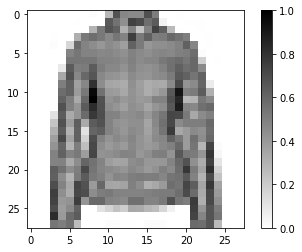

In [10]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.grid(False)
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()